<a href="https://colab.research.google.com/github/ponwinsiya2348539/lab1_ml/blob/main/2348539_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder


In [9]:
df=pd.read_csv('/content/sample_data/customer_shopping_data.csv')

In [10]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [11]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [12]:
df.sample(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
23549,I508266,C210567,Female,21,Clothing,3,900.24,Debit Card,18/03/2021,Zorlu Center
50517,I163844,C202434,Female,33,Clothing,5,1500.40,Credit Card,12/5/2022,Viaport Outlet
39862,I143696,C115229,Female,58,Souvenir,2,23.46,Cash,27/01/2023,Mall of Istanbul
92995,I563185,C167839,Male,24,Cosmetics,3,121.98,Credit Card,30/04/2022,Emaar Square Mall
33312,I334573,C226694,Female,21,Clothing,5,1500.40,Credit Card,6/7/2021,Kanyon
85384,I111355,C248250,Female,52,Cosmetics,1,40.66,Credit Card,1/9/2021,Zorlu Center
53568,I242584,C313940,Male,59,Food & Beverage,4,20.92,Cash,8/11/2021,Kanyon
86416,I259691,C596513,Female,29,Clothing,5,1500.40,Debit Card,9/4/2022,Metrocity
82951,I728918,C709287,Female,25,Clothing,5,1500.40,Credit Card,14/02/2023,Kanyon
25063,I288544,C114580,Male,36,Souvenir,2,23.46,Cash,9/2/2021,Forum Istanbul


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [14]:
# Filling null values
for col in df.select_dtypes(["int64","float64"]).columns:
  df[col]=df[col].fillna(df[col].mean())
  print(df[col].mean())

43.42708909377922
3.003428617392441
689.2563209226097


In [15]:
# Convert categorical variables to numerical values
le=LabelEncoder()
df['shopping_mall']=le.fit_transform(df['shopping_mall'])
df['gender']=le.fit_transform(df['gender'])
df['customer_id']=le.fit_transform(df['customer_id'])

In [16]:
df['age'].mean()

43.42708909377922

In [17]:
df.sample(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
34591,I219347,31965,1,48,Clothing,3,900.24,Credit Card,4/6/2021,1
49685,I199756,9408,1,19,Clothing,1,300.08,Debit Card,31/05/2021,5
5931,I108407,50796,1,42,Clothing,5,1500.40,Cash,25/10/2021,6
9749,I317331,34079,0,65,Cosmetics,2,81.32,Debit Card,24/08/2022,9
75181,I283752,53902,0,42,Food & Beverage,2,10.46,Debit Card,16/10/2021,4
8215,I725839,67774,0,68,Cosmetics,2,81.32,Debit Card,31/12/2022,1
36575,I211564,26381,1,29,Technology,2,2100.00,Debit Card,9/1/2023,5
41118,I185619,55542,1,51,Books,3,45.45,Credit Card,4/11/2021,2
33890,I205237,67170,1,51,Clothing,2,600.16,Debit Card,22/03/2021,7
35370,I133383,47566,1,53,Food & Beverage,3,15.69,Cash,7/9/2022,5


In [18]:
# Define age bins
age_bins = [18, 25, 35, 45, np.inf]
age_labels = ['18-25', '26-35', '36-45', '46+']

# Create AgeGroup column
df['ageGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [19]:
df['shopping_mall']

0        4
1        2
2        6
3        7
4        4
        ..
99452    4
99453    2
99454    6
99455    3
99456    5
Name: shopping_mall, Length: 99457, dtype: int64

In [20]:
print(df['age'])

0        28
1        21
2        20
3        66
4        53
         ..
99452    45
99453    27
99454    63
99455    56
99456    36
Name: age, Length: 99457, dtype: int64


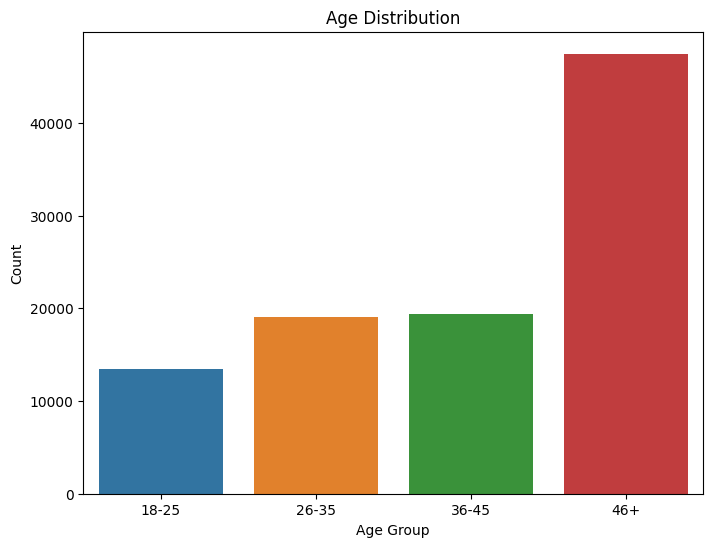

In [21]:
# Create a bar plot for age distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='ageGroup', data=df)
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [24]:
#Creating covariance matrix to determine the relation between 'Age' and 'satisfaction'
cov_matrix = np.cov(df['age'], df['shopping_mall'])
print(cov_matrix)

[[ 2.24701713e+02 -1.48120869e-02]
 [-1.48120869e-02  4.81007700e+00]]


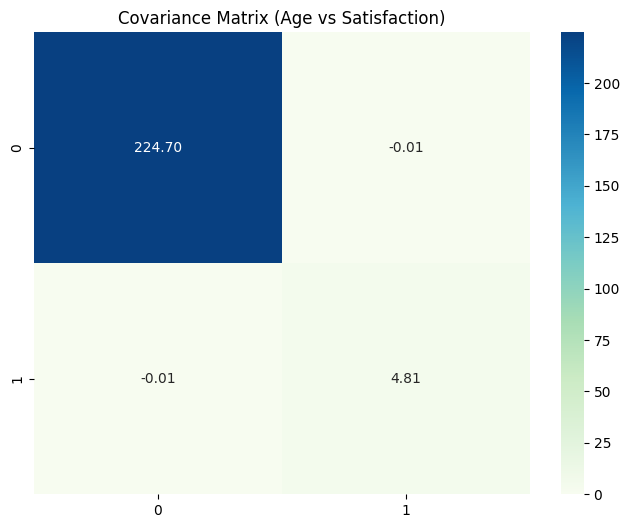

In [29]:
#Plotting heatmap for the above Covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='GnBu', fmt=".2f")
plt.title('Covariance Matrix (Age vs Satisfaction)')
plt.show()

In [31]:
# Perform chi-squared test for association between Gender and Satisfaction
contingency_table = pd.crosstab(df['gender'], df['shopping_mall'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display results of chi-squared test
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 12.446589184688175
P-value: 0.18928707120988486


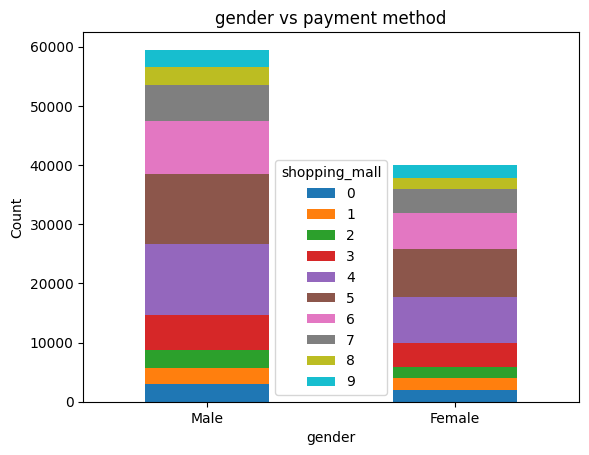

In [45]:
# Create a stacked bar plot for Gender vs Satisfaction
stacked_bar = contingency_table.plot(kind='bar', stacked=True)
plt.title('gender vs payment method')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.show()

In [38]:
# Perform independent t-test for Seat comfort between satisfied and dissatisfied customers
repeat_ratings = df[df['quantity'] == 1]['category']
non_repeat_ratings = df[df['quantity'] == 0]['category']
t_stat, p_value = ttest_ind(repeat_ratings, non_repeat_ratings)

# Display results of t-test
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: nan
P-value: nan


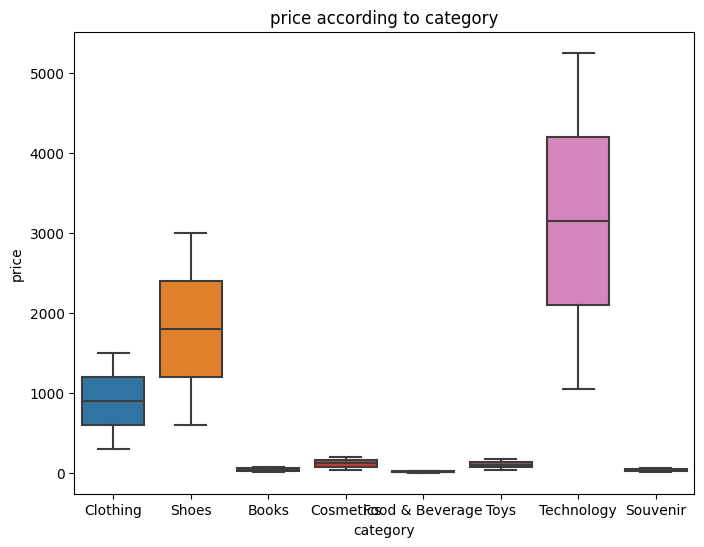

In [49]:
# Create box plots for Seat comfort by satisfied groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='category', y='price', data=df)
plt.title('price according to category')
plt.xlabel('category')
plt.ylabel('price')
plt.show()